## Play-ground to make initial data distributions.

In [1]:
#import Pkg; Pkg.add("FileIO")
using Distributions
using Plots
using FileIO
using JLD2
using LaTeXStrings
#Pkg.instantiate()

In [93]:
include("inidat_aux_functions.jl")

f_x

In [4]:
N = 40_000
v = zeros(N)
vb = 5
for i in 1:N
    v[i] = distribution_stream(vb)
end

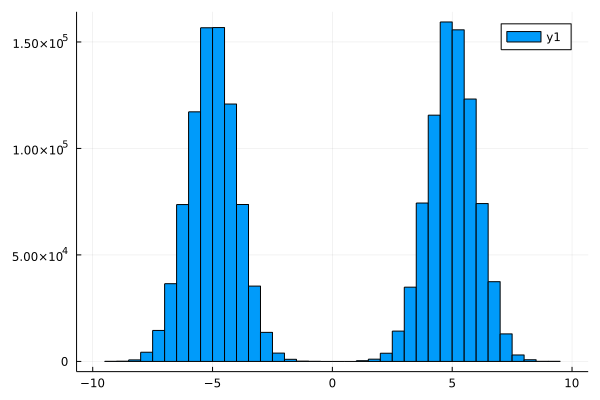

In [5]:
histogram(v, bins=:scott, weights=repeat(1:80, outer=500))

At first sigth they look very similar....

We now make and save some distributions to use as standard ones.

## Thermal Distributions

$$
f(x,v) = \frac{N}{L} \frac{1}{\sqrt{2\pi \theta}} e^{-\frac{v^2}{2\theta}}
$$

Thus, $\theta = \sigma^2$ is the variance of the distribution.

### Relativistic version

$$
f(x,p) = \frac{N}{L} \frac{1}{\sqrt{2\pi \theta}} e^{\frac{1 - \sqrt{1+\frac{p^2}{m^2}}}{2\theta}}
$$

In [6]:
#save("Initial_Distributions/par_dis_L5_N8_5_theta01.jld2", "par_dis", u)
#save("Initial_Distributions/par_dis_L5_N2_5_theta001.jld2", "par_dis", u)
#save("Initial_Distributions/par_dis_L5_N2_5_theta0001.jld2", "par_dis", u)
#save("Initial_Distributions/par_dis_L5_N2_5_theta00001.jld2", "par_dis", u)


## Landau Damping ##

The initial distribution is: 

$$
f(x,v,\alpha, k, \theta) = \frac{1}{\sqrt{2\pi \theta}} e^{-\frac{v^2}{2\theta}} (1 + \alpha cos(kx) )
$$

Since it is a product we can split into two distributions one for the position and one for the velocity.
The one for the velocity we already have, so we need to make only the random sampling of the spatial one. 

Some definitions $\hat{k} = k / k_D = k * \sqrt{\theta}$ Or $k = \hat{k} / \sqrt{\theta}$ 

In these simulations, $\theta = 10^{-3}$ $\sqrt{\theta} = 0.03162$

Thus to $\hat{k} = 0.01$ corresponds a $\lambda = 2\pi * \sqrt{\theta} / \hat{k} = 19.869$

For $\hat{k} = 0.40$ corresponds a $\lambda = 0.497$

For the first case an $L = 2 \lambda = 39.738$ is used and $J = 1761*2 = 3522$, $dx = L/J = 0.0112$

For the second $L=15*\lambda = 7.455$ is used and $J = 62 * 15 = 930$, $dx = 0.0080$

### Relativistic version

For the relativistic version we use the distribution (for momentum)

$$
f(p) = \frac{1}{4\pi m^3 c^3 \theta K^2(1/\theta)} e^{(1-\gamma) / \theta} \;\;\;\; \gamma = \sqrt{1+p^2}
$$

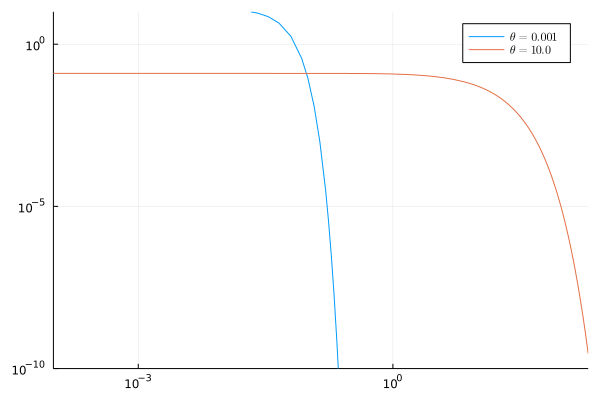

In [7]:
Plots.plot(u -> f_p_rel(u,(0.001,1))
, xscale=:log10, yscale=:log10, xlim=(0.0001,1), ylim=(1e-10,1e1)
, label=L"\theta = 0.001")
Plots.plot!(u -> f_p_rel(u,(10.,1))
, xscale=:log10, yscale=:log10, xlim=(0.0001,200)
, label=L"\theta = 10.0")

In [5]:
damped = false
undamped_s = false
undamped_l = false
vlasov_exp_200 = false
vlasov_exp_40 = false
damped = true
#undamped_s = true

#vlasov_exp_200 = true
#vlasov_exp_40 = true

N_exp = 6
N = 8*10^(N_exp)

data_name = "par_dis_landau_norm_norel_"

if undamped_l
    L= 39.738 
    #m = 20 # 
    m = 2
    data_name = data_name * "undamped_l_$(m)_"
elseif undamped_s
    L= 4 
    #m = 20 # 
    m = 2 # this corresponds to a k approx 0.1
    data_name = data_name * "undamped_s_$(m)_"
elseif damped
    L = 7.455
    m = 15 # 12, 15, 19
    data_name = data_name * "damped_$(m)_"
elseif vlasov_exp_200
    L = 200.
    #m = 2
    m = 10
    data_name = data_name * "vla_200_$(m)_"
elseif vlasov_exp_40
    L = 40.
    m = 2
    data_name = data_name * "vla_40_$(m)_"
end


k = 2π*m/L # this here is k, not \hat{k}
alpha_exp = 2
α = 10.0^(-alpha_exp) # 0.1 0.001

exp_Theta = 3
θ = 10.0^(-exp_Theta)

interval_x = (0.0,L)
p_max = sqrt((1+10*θ)^2-1) 
interval_p = (0, p_max) # we then antisymmetrize to get the negative values.
par_f_x = (α, m, L)
par_f_p_1 = (θ,1) #to compute the norm of f_p
par_init = (N,)
norm = norm_f_p_rel(f_p_rel,par_f_p_1,20000,p_max)
par_f_p = (θ,norm)

data_name = data_name * "alp$(alpha_exp)_8$(N_exp)_Th$(exp_Theta)"

#build_initial_data(data_name::String, par_init, f_x, f_x_max, par_f_x, interval_x, f_p_rel, f_p_rel_max, par_f_p, interval_p);
build_initial_data(data_name::String, par_init, f_x, f_x_max, par_f_x, interval_x, f_p, f_p_max, par_f_p, interval_p);

In [4]:
par_dis, run_name, pars, par_f_x, par_f_p = retrieve_initial_data("Initial_Distributions/" * data_name * ".jld2")

@show run_name, pars, par_f_x, par_f_p

(run_name, pars, par_f_x, par_f_p) = ("par_dis_landau_norm_norel_damped_15_alp2_86_Th3", (8000000,), (0.010000000000000002, 15, 7.455), (0.001, 1.0003670751902618))


("par_dis_landau_norm_norel_damped_15_alp2_86_Th3", (8000000,), (0.010000000000000002, 15, 7.455), (0.001, 1.0003670751902618))

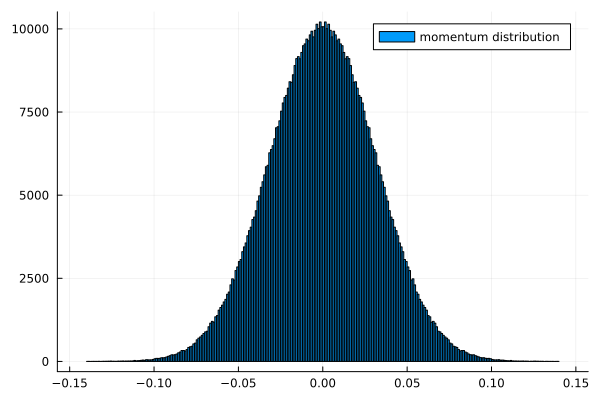

In [5]:
histogram(par_dis[N+1:2N], label="momentum distribution")

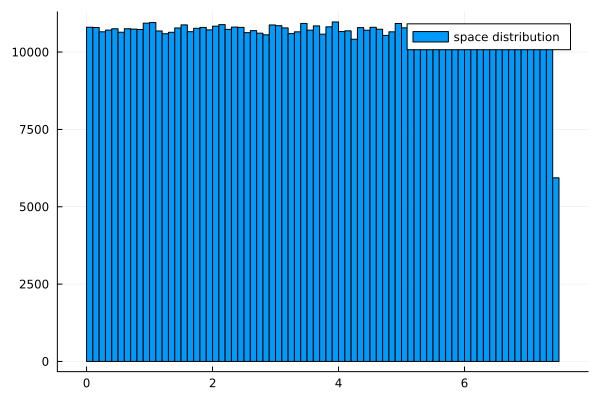

In [11]:
histogram(par_dis[1:N], label="space distribution")

## 2D Distributions

In [7]:
const D = 2

2

In [27]:


damped = false
undamped_s = false
undamped_l = false
vlasov_exp_200 = false
vlasov_exp_40 = false
damped = false
thermal_40 = true
#undamped_s = true
no_rel = true

#vlasov_exp_200 = true
#vlasov_exp_40 = true

N_exp = 6
N = 10^(N_exp)

if no_rel
    data_name = "par_dis_norel"
else
    data_name = "par_dis_rel"
end


#data_name = data_name * "_thermal_40"

if undamped_l
    L= 39.738 
    #m = 20 # 
    m = 2
    data_name = data_name * "undamped_l_$(m)_"
elseif undamped_s
    L= 4 
    #m = 20 # 
    m = 2 # this corresponds to a k approx 0.1
    data_name = data_name * "undamped_s_$(m)_"
elseif damped
    L = 7.455
    m = 15 # 12, 15, 19
    data_name = data_name * "damped_$(m)_"
elseif vlasov_exp_200
    L = 200.
    #m = 2
    m = 10
    data_name = data_name * "vla_200_$(m)_"
elseif vlasov_exp_40
    L = 40.
    m = 2
    data_name = data_name * "vla_40_$(m)_"
elseif thermal_40
    Box_x = (0.0,40.0,0.0,40.0) 
    m = [1,0]
    data_name = data_name * "ther_40_$(m)_"
end

Box_array = zeros(2D)
Box_array = [i for i in Box_x]

k = 2π*m./(Box_array[2:2:end]-Box_array[1:2:end-1]) # this here is k, not \hat{k}
alpha_exp = 0
α = 10.0^(-alpha_exp) # 0.1 0.001

exp_Theta = 3
θ = 10.0^(-exp_Theta)

par_f_x = (α, m, Box_x)

p_max = sqrt((1+10*θ)^2-1) 
Box_p = (-p_max,p_max,-p_max,p_max)

par_f_p = (θ,D)

#par_f_p_1 = (θ,1,D) #to compute the norm of f_p
#norm = int_mid_point_f(f_p_rel, par_f_p_1, [20_000,20_000], Box_p)
#par_f_p_rel = (θ,norm,D)

data_name = data_name * "alp$(alpha_exp)_$(N_exp)_Th$(exp_Theta)"

 
par_init = (N,)

if no_rel
    build_initial_data_D(data_name::String, par_init, f_x, f_x_max, par_f_x, Box_x, f_p, f_p_max, par_f_p, Box_p)
else
    build_initial_data_D(data_name::String, par_init, f_x, f_x_max, par_f_x, Box_x, f_p_rel, f_p_rel_max, par_f_p_rel, Box_p)
end

D = 2


4000000-element Vector{Float64}:
  6.296659711036541
 23.85714424054892
  0.03677654283550383
  0.006066790150046603
 29.179850010540154
 11.399482105026792
  0.0656454487979656
 -0.0544893008650295
 38.133795332062306
 14.083107470980636
  ⋮
 -0.012034486696887559
 37.752732887468994
 33.359737160824984
 -0.002831640804847324
  0.007950323563596623
  9.650430999910169
 18.48693725241712
  0.0026070884509891423
  0.028207831569547814

In [28]:
par_dis, run_name, pars, par_f_x, Box_x, par_f_p, Box_p = retrieve_initial_data_D("Initial_Distributions/" * data_name * ".jld2")

([6.296659711036541, 23.85714424054892, 0.03677654283550383, 0.006066790150046603, 29.179850010540154, 11.399482105026792, 0.0656454487979656, -0.0544893008650295, 38.133795332062306, 14.083107470980636  …  0.03304126152449975, -0.012034486696887559, 37.752732887468994, 33.359737160824984, -0.002831640804847324, 0.007950323563596623, 9.650430999910169, 18.48693725241712, 0.0026070884509891423, 0.028207831569547814], "par_dis_norelther_40_[1, 0]_alp0_6_Th3", (1000000,), (1.0, [1, 0], (0.0, 40.0, 0.0, 40.0)), (0.0, 40.0, 0.0, 40.0), (0.001, 2), (-0.14177446878757827, 0.14177446878757827, -0.14177446878757827, 0.14177446878757827))

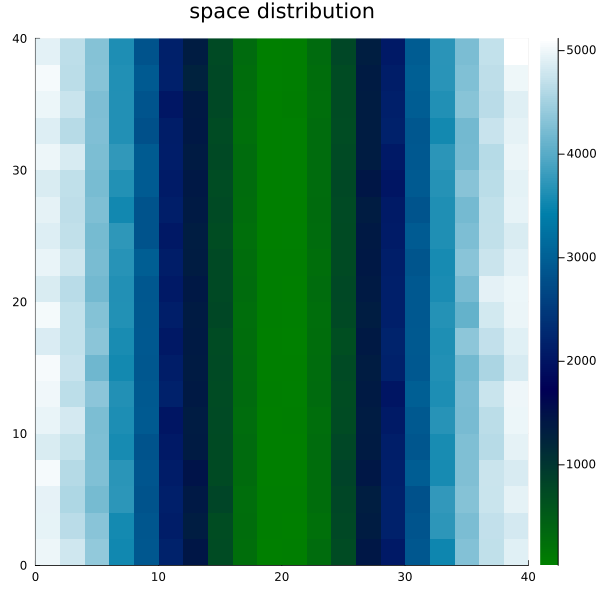

In [29]:
plot(histogram2d(par_dis[1:2D:end],par_dis[2:2D:end], title="space distribution" ))

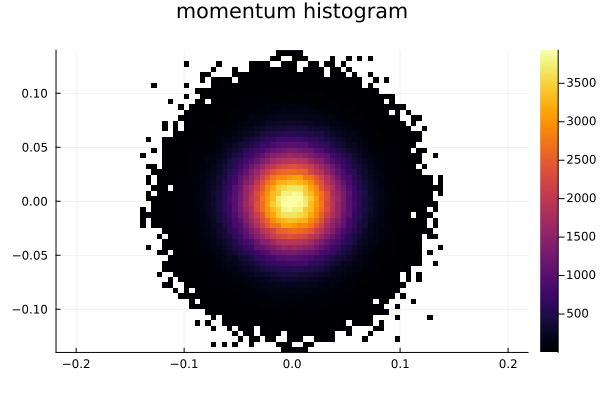

In [19]:
plot(histogram2d(par_dis[3:4:end],par_dis[4:4:end] )
,aspectratio=1
,title = "momentum histogram"
)

In [125]:
include("inidat_aux_functions.jl")
T = get_temperature_rel_D(par_dis,N,D)

0.001001267247843108

In [101]:
T*3

0.002002534495686216

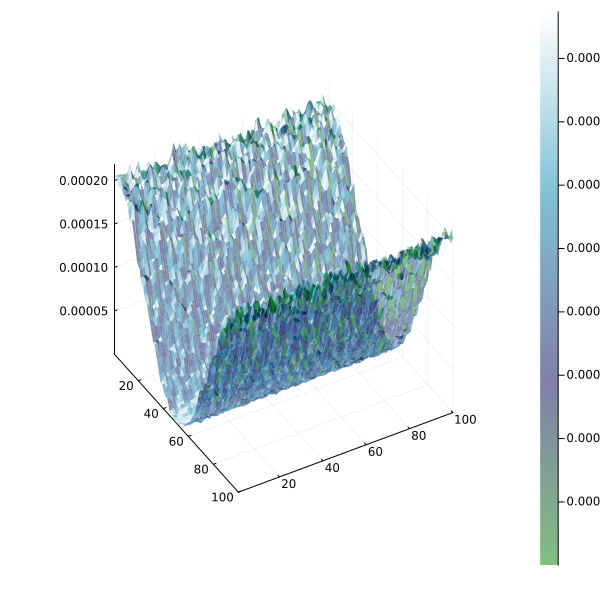

In [53]:
J = (100,100)
par_grid = (N, Box_x, J, 5)
n = zeros(J[1],J[2])

get_density_2D!(par_dis, n, par_grid, 0.0)

plot_matrix(n)

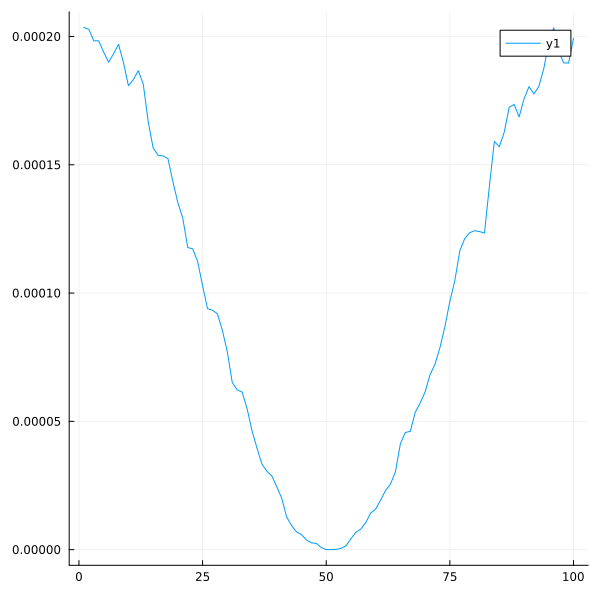

In [54]:
plot(n[:,5])

In [55]:
sum(n)

1.0

In [122]:
J = (100,80)
par_grid = N, Box_x, J, 5 
S = [[0.0,0.0] for i in 1:J[1], j in 1:J[2]] # [[0,0] for i in 1:10, j in 1:8]
get_current_rel_2D!(par_dis, S, par_grid)
S[3,4]

2-element Vector{Float64}:
 -3.0986421375617113e-8
 -2.0293571322937345e-7

In [108]:
S[1,2][2]

3.927641581776914e-8

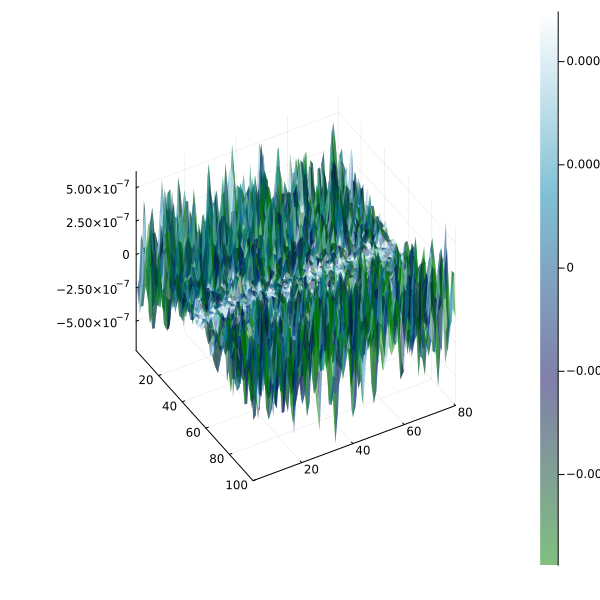

In [123]:
plot_matrix(getindex.(S,1))

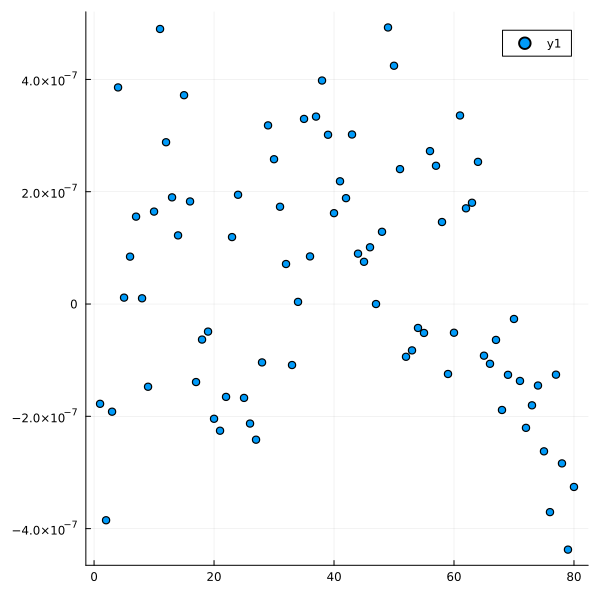

In [124]:
Plots.scatter(getindex.(S,1)[1,:])

In [ ]:
plot(get)

10×8 Matrix{Vector{Float64}}:
 [0.1, 0.1]  [0.1, 0.2]  [0.1, 0.3]  …  [0.1, 0.6]  [0.1, 0.7]  [0.1, 0.8]
 [0.2, 0.1]  [0.2, 0.2]  [0.2, 0.3]     [0.2, 0.6]  [0.2, 0.7]  [0.2, 0.8]
 [0.3, 0.1]  [0.3, 0.2]  [0.3, 0.3]     [0.3, 0.6]  [0.3, 0.7]  [0.3, 0.8]
 [0.4, 0.1]  [0.4, 0.2]  [0.4, 0.3]     [0.4, 0.6]  [0.4, 0.7]  [0.4, 0.8]
 [0.5, 0.1]  [0.5, 0.2]  [0.5, 0.3]     [0.5, 0.6]  [0.5, 0.7]  [0.5, 0.8]
 [0.6, 0.1]  [0.6, 0.2]  [0.6, 0.3]  …  [0.6, 0.6]  [0.6, 0.7]  [0.6, 0.8]
 [0.7, 0.1]  [0.7, 0.2]  [0.7, 0.3]     [0.7, 0.6]  [0.7, 0.7]  [0.7, 0.8]
 [0.8, 0.1]  [0.8, 0.2]  [0.8, 0.3]     [0.8, 0.6]  [0.8, 0.7]  [0.8, 0.8]
 [0.9, 0.1]  [0.9, 0.2]  [0.9, 0.3]     [0.9, 0.6]  [0.9, 0.7]  [0.9, 0.8]
 [1.0, 0.1]  [1.0, 0.2]  [1.0, 0.3]     [1.0, 0.6]  [1.0, 0.7]  [1.0, 0.8]